### How to run 
`python bright.py --image retina.jpg --radius 41`

#### To track the sun position we need to fix the camera in both east and west [opp] sides. So that fixed frame of the image can find the sun within it. 

Based on the position of the sun compared to the x, y 0,0 cordinate we can easily find out how far +x [east] or -x [west]

In [10]:
# import the necessary packages
import numpy as np
import argparse
import cv2
%matplotlib inline
from matplotlib import pyplot as plt

In [11]:
# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", help = "path to the image file")
# ap.add_argument("-r", "--radius", type = int, help = "radius of Gaussian blur; must be odd")
# ap.add_argument("-f", "--file", required=False)
# args = vars(ap.parse_args())

In [12]:
# if it is direct image and running from the jupyter nootbook environment
# otherwise comment the bellow line
args = {}

# args["image"] = 'images/no_bright.jpeg'
# args["image"] = 'images/retina.jpg'
args["image"] = 'images/sun_on_scene2.jpeg'
args["radius"] = 21

In [13]:
# load the image and convert it to grayscale
image = cv2.imread(args["image"])
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [14]:
# perform a naive attempt to find the (x, y) coordinates of
# the area of the image with the largest intensity value
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
print(minVal, maxVal, minLoc, maxLoc)
if minVal == maxVal and minLoc == maxLoc:
    print('No bright spot')
else:
    cv2.circle(image, maxLoc, 5, (255, 0, 0), 2)

0.0 255.0 (0, 139) (136, 85)


In [15]:
# display the results of the naive attempt
cv2.imshow("Naive", image)

In [19]:
# apply a Gaussian blur to the image then find the brightest
# region
gray = cv2.GaussianBlur(gray, (args["radius"], args["radius"]), 0)
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
image = orig.copy()
if minVal == maxVal and minLoc == maxLoc:
    print('No bright spot')
else:
    cv2.circle(image, maxLoc, args["radius"], (255, 0, 0), 2)

In [20]:
# display the results of our newly improved method
# cv2.imshow("Show", image)
# cv2.waitKey(0)
# cv2.destroyWindow('Show') #close the image window

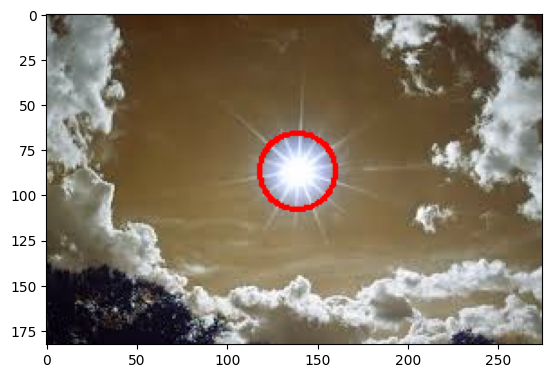

In [21]:
plt.imshow(image)
plt.show()